<a href="https://colab.research.google.com/github/biranchi2018/PyTorchBasics/blob/main/1.PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting started with PyTorch



https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

https://developers.redhat.com/learn/openshift-data-science/how-create-pytorch-model/build-train-and-run-your-pytorch-model

https://machinelearningmastery.com/save-and-load-your-pytorch-models/


In [ ]:
!pip install matplotlib -q

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
# from torch.autograd import Variable

### Preparing the Data

In [45]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)


In [46]:
type(x_train)

torch.Tensor

In [5]:
x_train.shape

torch.Size([15, 1])

In [6]:
x_train[:5]

tensor([[3.3000],
        [4.4000],
        [5.5000],
        [6.7100],
        [6.9300]])

### Creating a LinearRegression Model

In [7]:
# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = linearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [8]:
model

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_sta

In [18]:
# help(model)

In [15]:
model.named_parameters()

<generator object Module.named_parameters at 0x7f677e62f6f0>

In [16]:
for key in model.named_parameters():
  print(key)

('linear.weight', Parameter containing:
tensor([[0.7047]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([-0.1337], requires_grad=True))


In [11]:
model.parameters()

<generator object Module.parameters at 0x7f677e732500>

In [13]:
for key in model.parameters():
  print(key)

Parameter containing:
tensor([[0.7047]], requires_grad=True)
Parameter containing:
tensor([-0.1337], requires_grad=True)


In [19]:
model.get_parameter('linear.weight')

Parameter containing:
tensor([[0.7047]], requires_grad=True)

In [22]:
model.get_parameter('linear.weight').detach().numpy()

array([[0.7046567]], dtype=float32)

In [24]:
model.get_parameter('linear.weight').data.numpy()

array([[0.7046567]], dtype=float32)

In [20]:
model.get_parameter('linear.bias')

Parameter containing:
tensor([-0.1337], requires_grad=True)

In [23]:
model.get_parameter('linear.bias').detach().numpy()

array([-0.13368475], dtype=float32)

In [9]:
criterion

MSELoss()

In [10]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Model State before Training

In [56]:
print("Accessing the model state_dict")

for values in model.state_dict():
  print(values, "\t",
        model.state_dict()[values].numpy(), "\t",
        model.state_dict()[values].size())

Accessing the model state_dict
linear.weight 	 [[0.38773337]] 	 torch.Size([1, 1])
linear.bias 	 [-0.1411777] 	 torch.Size([1])


### Model Training

In [27]:
# 开始训练
num_epochs = 500
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')


Epoch[20/500], loss: 0.275050
Epoch[40/500], loss: 0.274941
Epoch[60/500], loss: 0.274832
Epoch[80/500], loss: 0.274724
Epoch[100/500], loss: 0.274615
Epoch[120/500], loss: 0.274506
Epoch[140/500], loss: 0.274398
Epoch[160/500], loss: 0.274290
Epoch[180/500], loss: 0.274181
Epoch[200/500], loss: 0.274073
Epoch[220/500], loss: 0.273965
Epoch[240/500], loss: 0.273858
Epoch[260/500], loss: 0.273750
Epoch[280/500], loss: 0.273642
Epoch[300/500], loss: 0.273535
Epoch[320/500], loss: 0.273427
Epoch[340/500], loss: 0.273320
Epoch[360/500], loss: 0.273213
Epoch[380/500], loss: 0.273106
Epoch[400/500], loss: 0.272999
Epoch[420/500], loss: 0.272892
Epoch[440/500], loss: 0.272785
Epoch[460/500], loss: 0.272678
Epoch[480/500], loss: 0.272572
Epoch[500/500], loss: 0.272465


In [28]:
model.eval()

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Model State after Training

In [57]:
print("Accessing the model state_dict")

for values in model.state_dict():
  print(values, "\t",
        model.state_dict()[values].numpy(), "\t",
        model.state_dict()[values].size())

Accessing the model state_dict
linear.weight 	 [[0.38773337]] 	 torch.Size([1, 1])
linear.bias 	 [-0.1411777] 	 torch.Size([1])


### Model Predictions

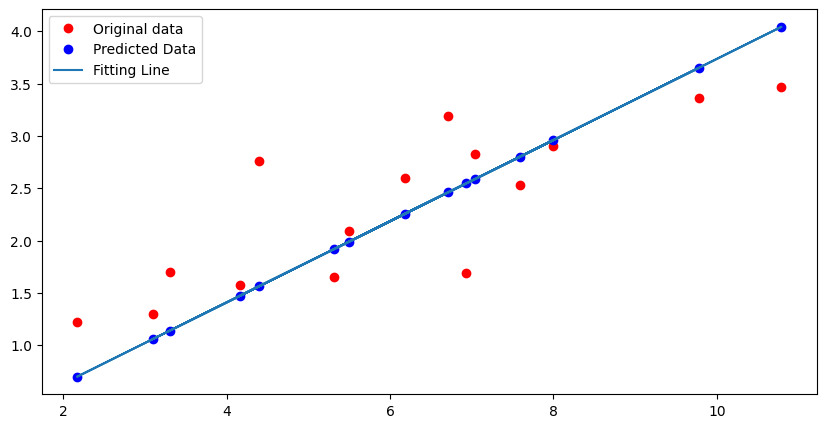

In [37]:
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, 'bo', label='Predicted Data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend()
plt.show()


### Calculate R2 Score

In [39]:
from sklearn.metrics import r2_score

In [47]:
y_train

tensor([[1.7000],
        [2.7600],
        [2.0900],
        [3.1900],
        [1.6940],
        [1.5730],
        [3.3660],
        [2.5960],
        [2.5300],
        [1.2210],
        [2.8270],
        [3.4650],
        [1.6500],
        [2.9040],
        [1.3000]])

In [48]:
y_true = y_train.numpy()
y_true

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

In [49]:
y_pred = predict
y_pred

array([[1.1383425 ],
       [1.5648493 ],
       [1.9913559 ],
       [2.4605134 ],
       [2.5458145 ],
       [1.4748951 ],
       [3.6504672 ],
       [2.25579   ],
       [2.8017187 ],
       [0.69904053],
       [2.5892406 ],
       [4.0428534 ],
       [1.9188497 ],
       [2.9595263 ],
       [1.0607958 ]], dtype=float32)

In [50]:
r2_score(y_true, y_pred)

0.4990324937155268

### Save the model

In [38]:
# 保存模型
torch.save(model.state_dict(), './linear.pth')

### Load the Saved Model

In [61]:
torch.load('./linear.pth')

OrderedDict([('linear.weight', tensor([[0.3877]])),
             ('linear.bias', tensor([-0.1412]))])

In [62]:
model2 = linearRegression()
model2.load_state_dict(torch.load('./linear.pth'))
model2

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
model2.eval()

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Predict on Test Data

In [72]:
x_test = torch.tensor([[2.103]], dtype=torch.float32)
x_test

tensor([[2.1030]])

In [73]:
type(x_test)

torch.Tensor

In [74]:
with torch.no_grad():
    predict2 = model(x_test)
predict2 = predict2.data.numpy()
predict2

array([[0.6742255]], dtype=float32)